In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#### Displaying the first few rows of the dataset to understand its structure


In [25]:
data = pd.read_csv('dataforhomework.csv')
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0,0.310908,0.232050,-1.407464,-1.448084,-0.471038,1.475356,-0.718444,-0.213447,-124.619197
1,1,-0.817682,0.423889,-0.538574,-0.965783,0.819373,-1.133830,-0.466759,-1.482984,-13.820467
2,2,-1.002217,-0.415967,0.608246,-0.945746,-0.096624,-0.752435,-1.317132,0.776028,-65.524126
3,3,-0.215787,0.103538,-0.260036,1.431152,1.594178,-1.177761,-0.880012,0.269181,172.825010
4,4,0.565510,0.021272,1.702215,0.308833,1.238283,-1.760763,0.240753,2.601683,216.168666


####  Calculate Correlation Coefficients

In [26]:
corr_matrix = data.corr()

corr_matrix

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,Y
Unnamed: 0,1.000000,-0.025756,0.021994,0.016182,-0.003903,0.028125,-0.057993,-0.015573,-0.022944,0.003354
X1,-0.025756,1.000000,0.015110,-0.008856,-0.039790,0.010482,0.023873,-0.027470,0.031273,-0.041675
X2,0.021994,0.015110,1.000000,-0.032481,-0.048422,-0.036899,-0.020355,-0.006867,-0.053999,0.338220
X3,0.016182,-0.008856,-0.032481,1.000000,-0.002264,-0.034017,0.000836,-0.073813,0.029697,0.280496
X4,-0.003903,-0.039790,-0.048422,-0.002264,1.000000,0.003066,-0.008435,-0.038272,0.024908,0.718921
X5,0.028125,0.010482,-0.036899,-0.034017,0.003066,1.000000,-0.021900,-0.024587,0.017166,-0.009531
X6,-0.057993,0.023873,-0.020355,0.000836,-0.008435,-0.021900,1.000000,0.025117,-0.010509,-0.001805
X7,-0.015573,-0.027470,-0.006867,-0.073813,-0.038272,-0.024587,0.025117,1.000000,-0.011721,0.451522
X8,-0.022944,0.031273,-0.053999,0.029697,0.024908,0.017166,-0.010509,-0.011721,1.000000,0.002786
Y,0.003354,-0.041675,0.338220,0.280496,0.718921,-0.009531,-0.001805,0.451522,0.002786,1.000000


#### Pairplots of dataset

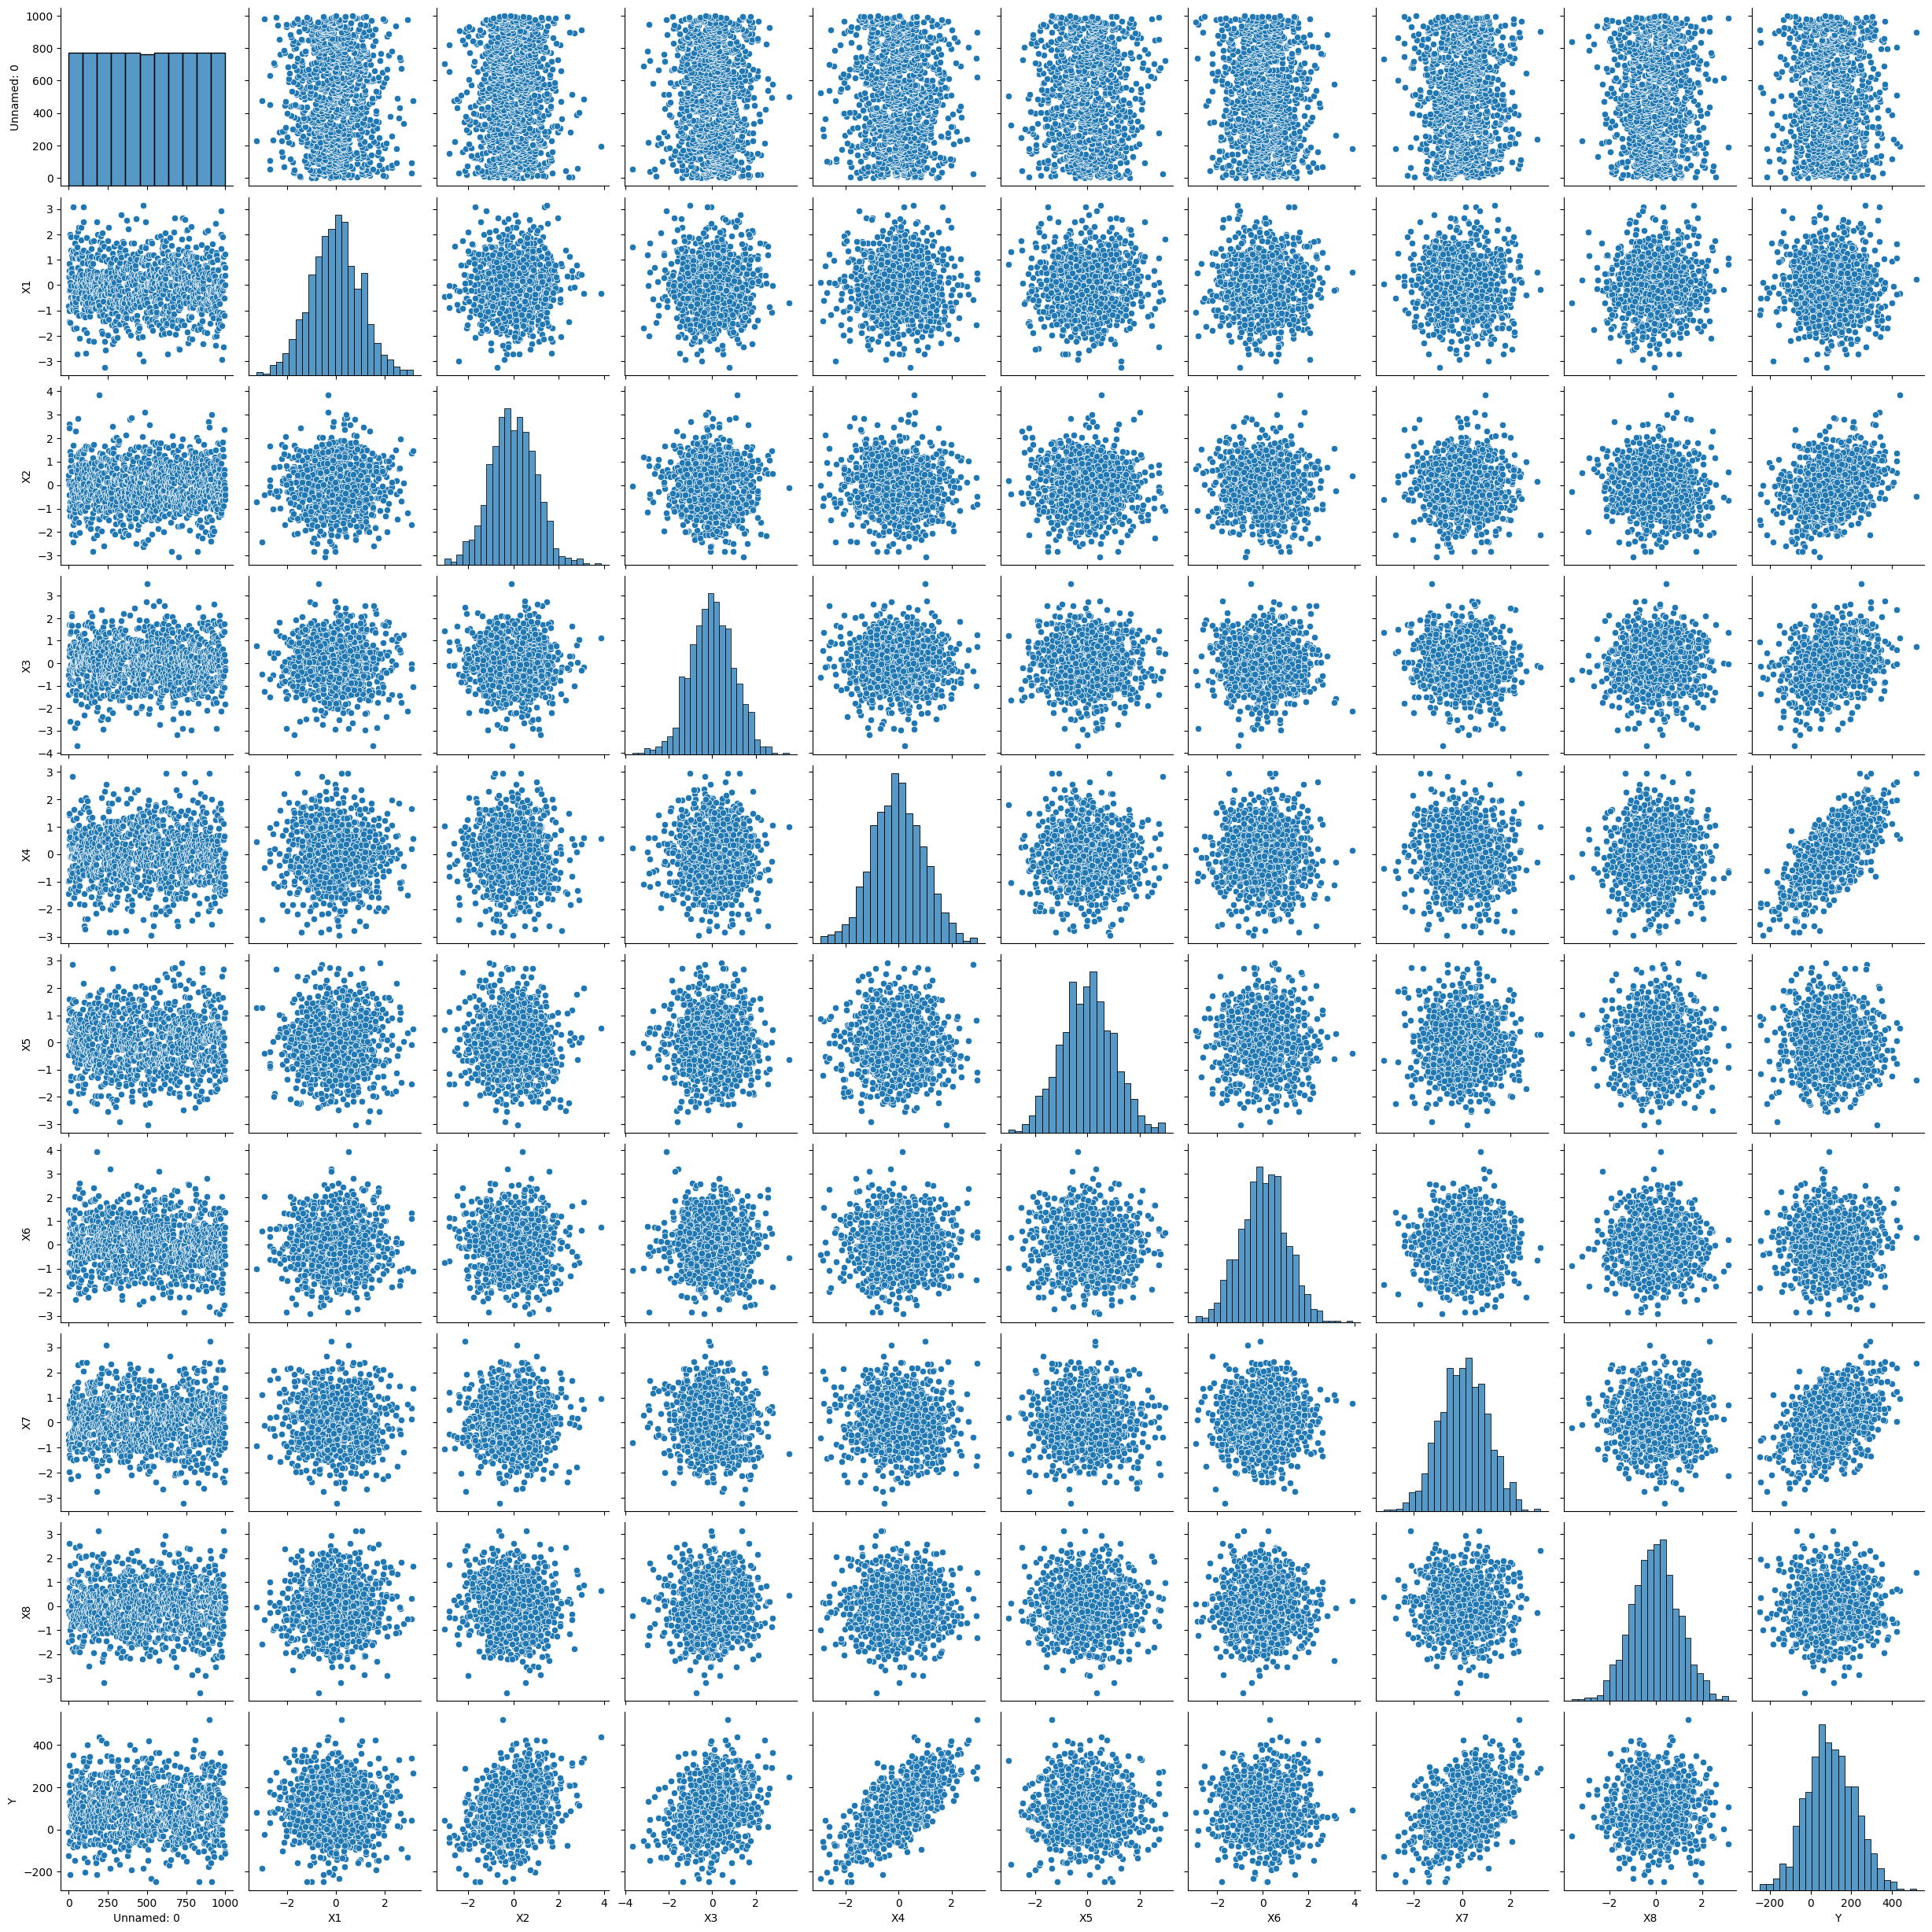

In [27]:
sns.pairplot(data)
plt.show()

#### Heatmap of Correlation Matrix

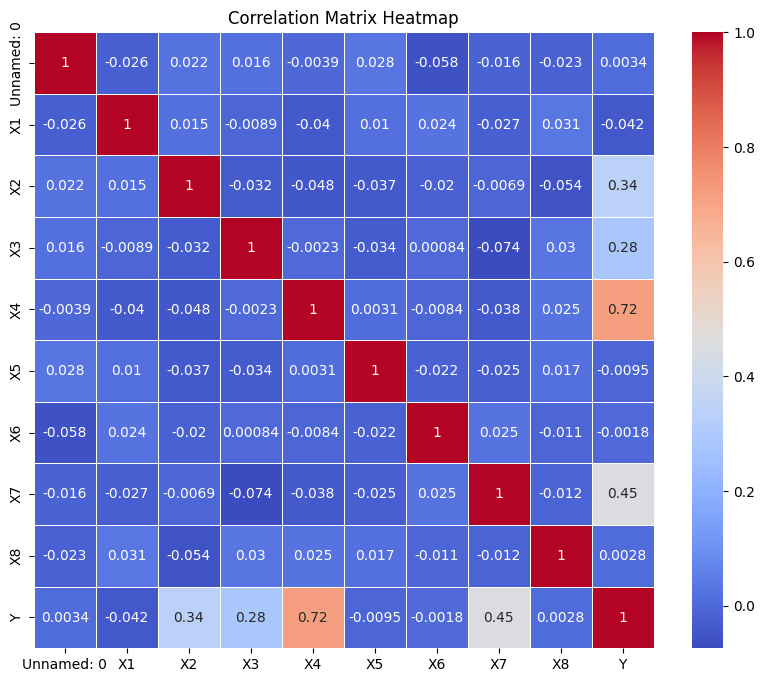

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Histogram and Density Plots

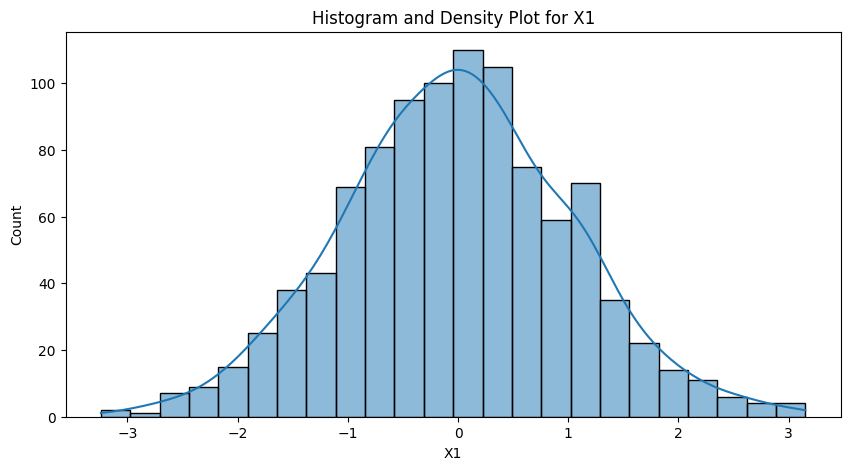

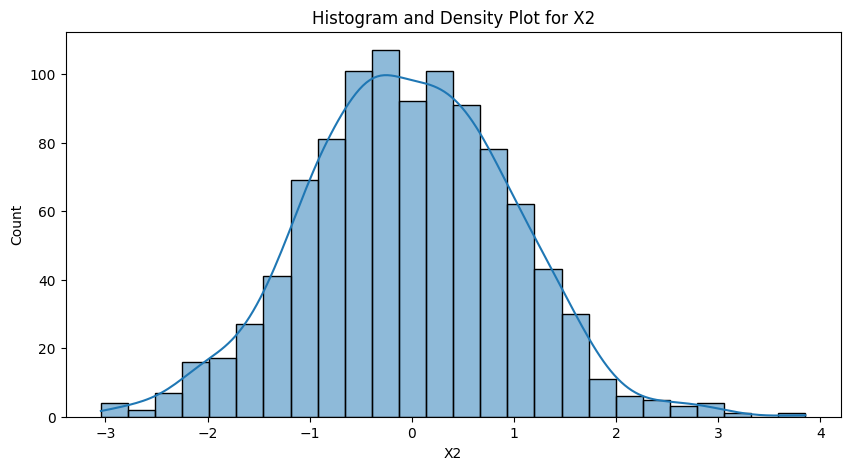

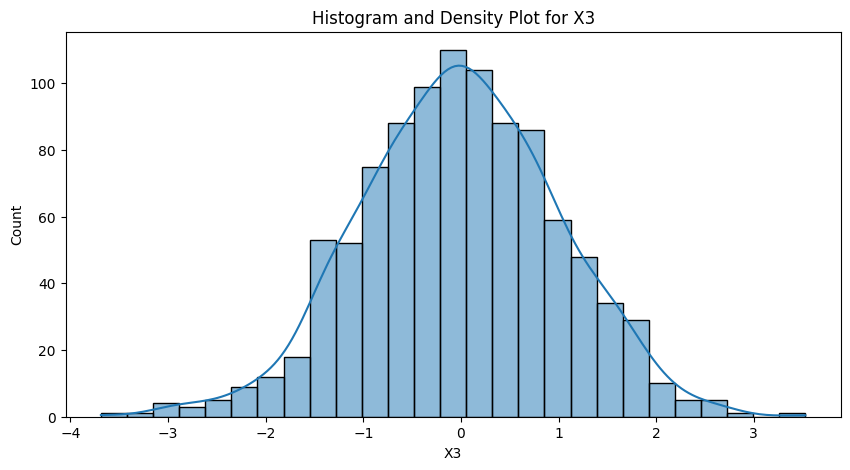

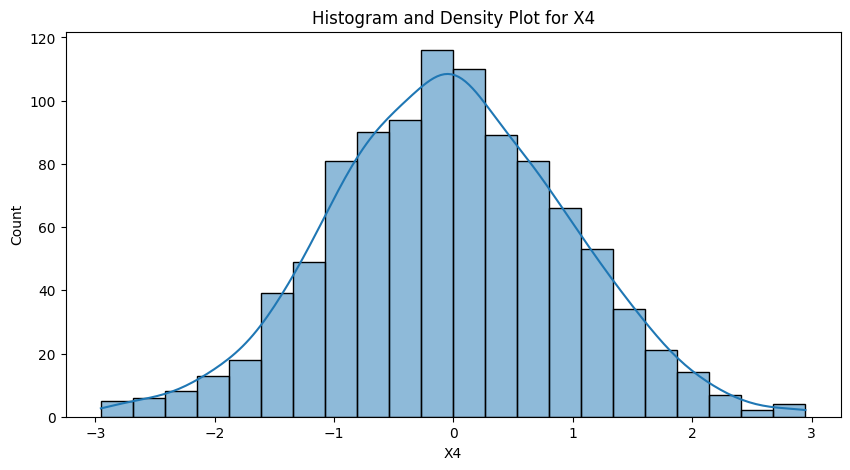

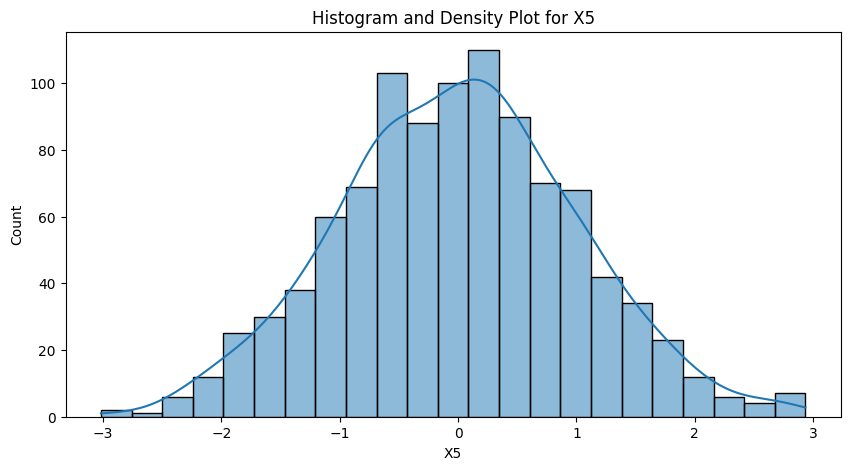

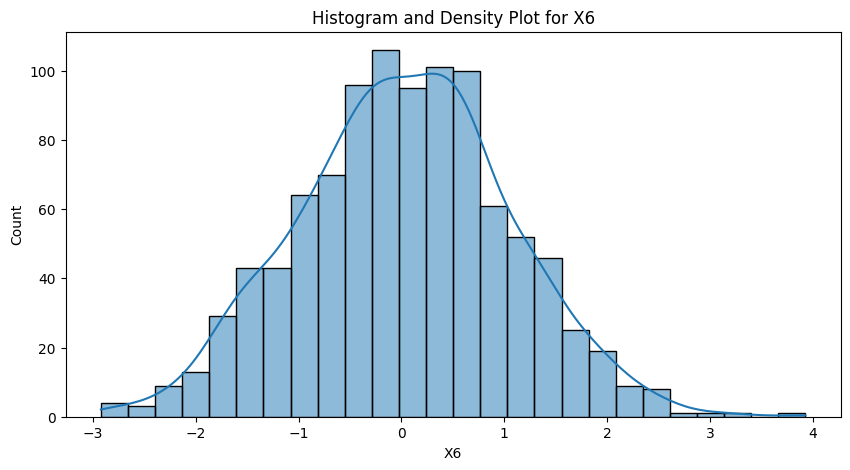

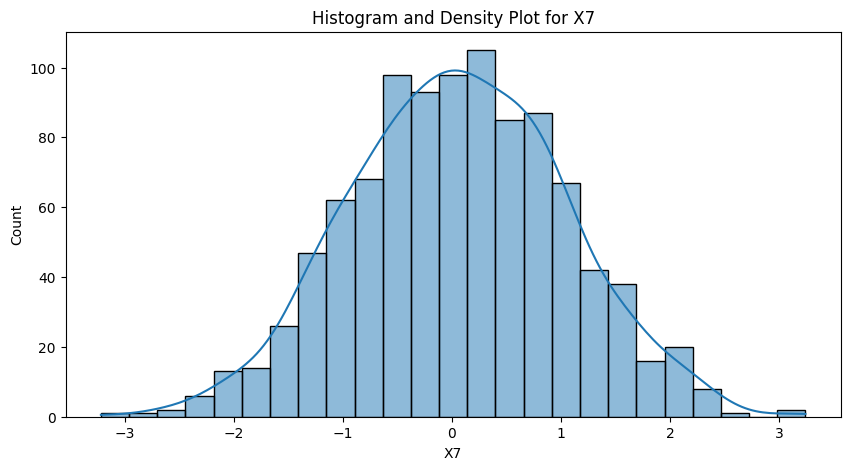

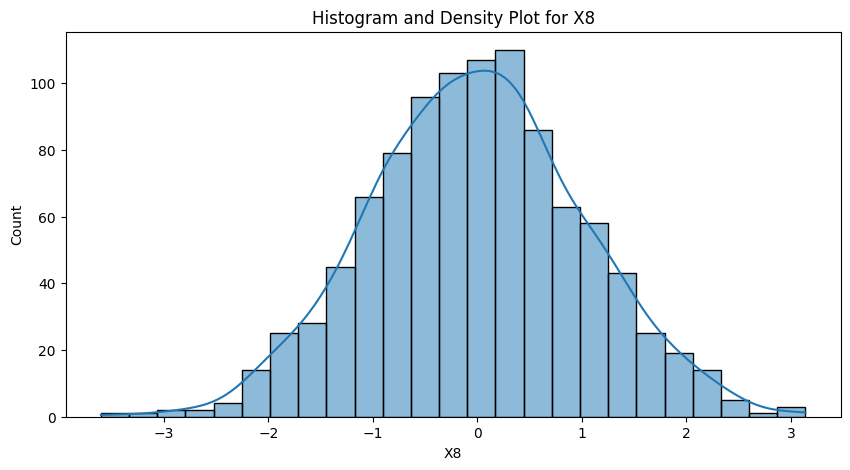

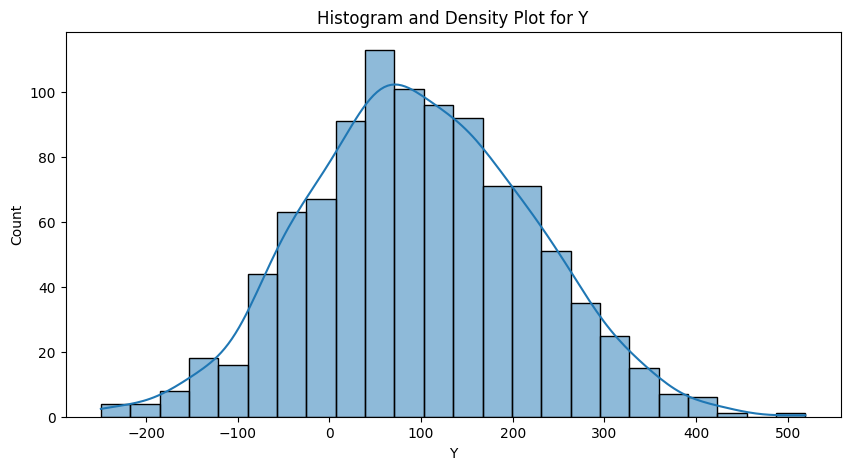

In [29]:
data = data.drop(columns=['Unnamed: 0'])


for column in data.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram and Density Plot for {column}')
    plt.show()

Bunda  korinib turibdiki barcha malumotlar normal distributsiyaga tushyapti va juda yaxshi ifodalab kelyapti

#### Printing the coefficients of variables


In [30]:
X = data.drop(columns=['Y'])
y = data['Y']


model = LinearRegression()
model.fit(X, y)



coefficients = pd.Series(model.coef_, index=X.columns)

print(coefficients)

X1    -0.092571
X2    46.983478
X3    39.785493
X4    92.346221
X5     3.178599
X6     0.010162
X7    62.494335
X8     0.073164
dtype: float64


#### Boxplots

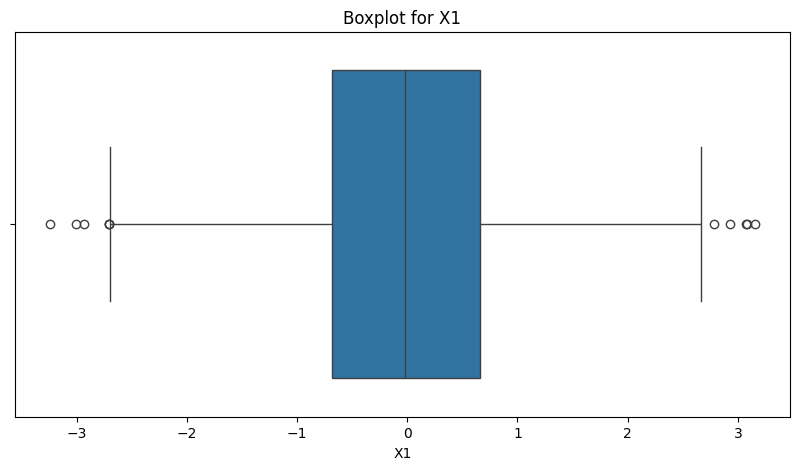

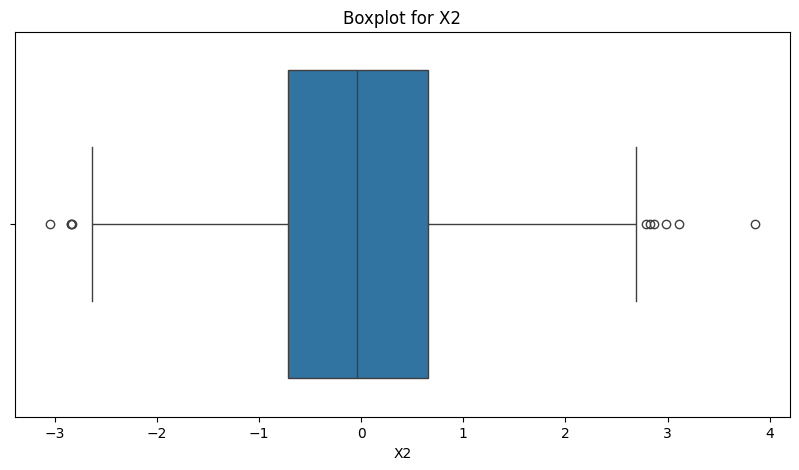

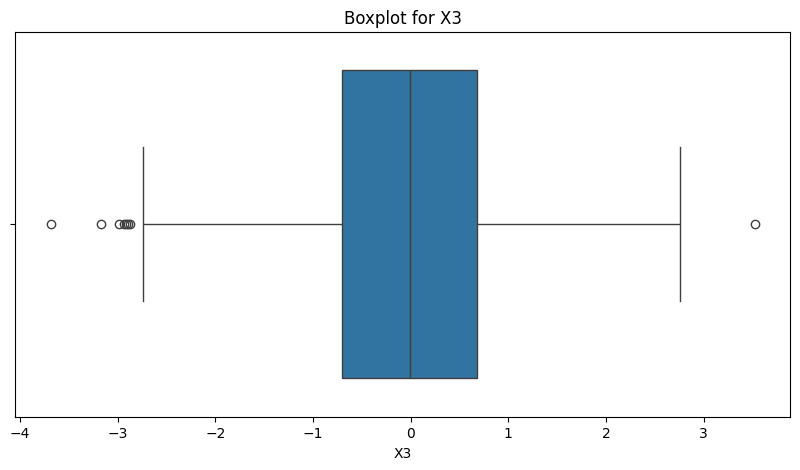

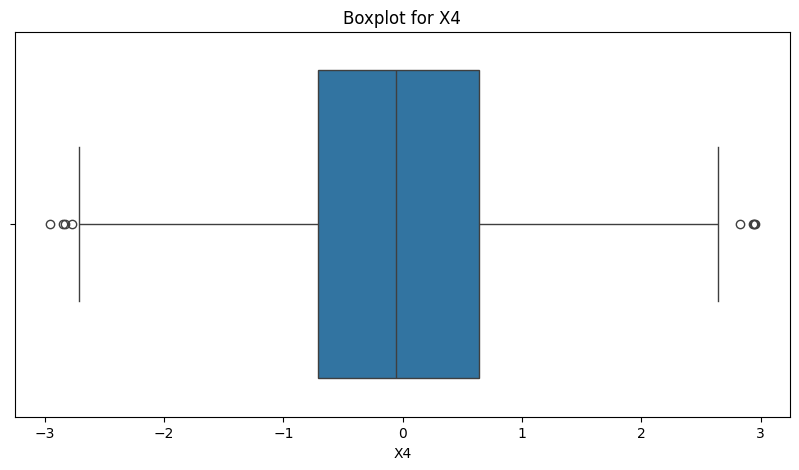

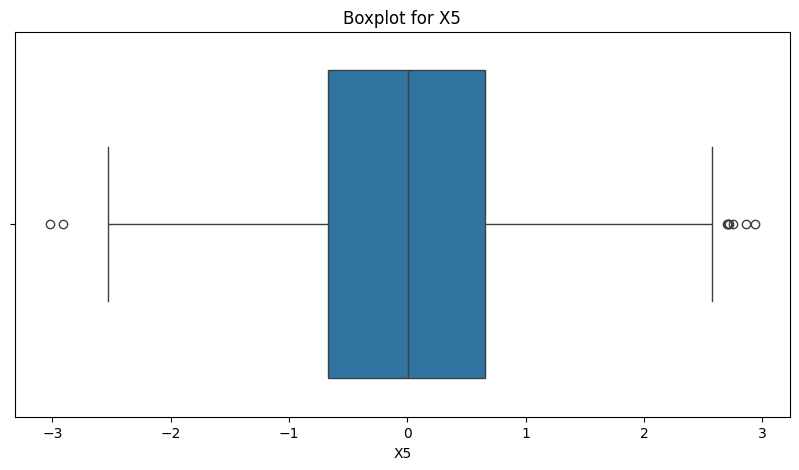

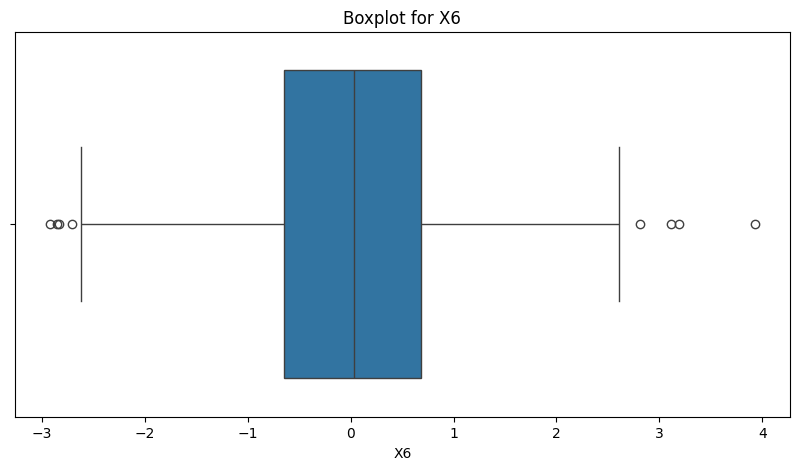

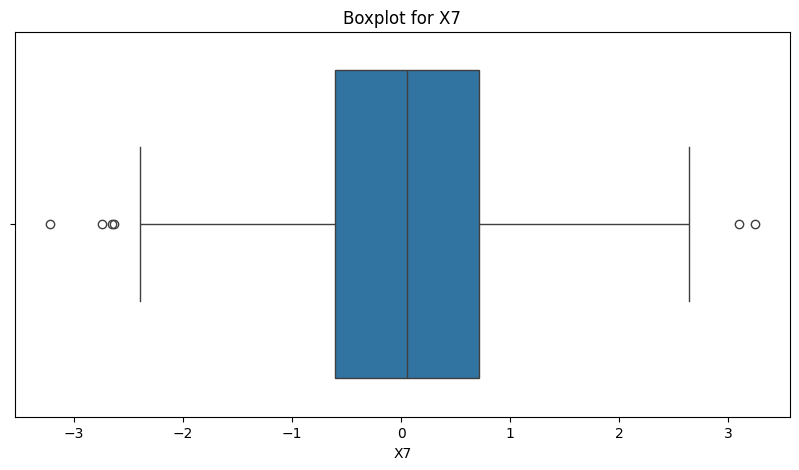

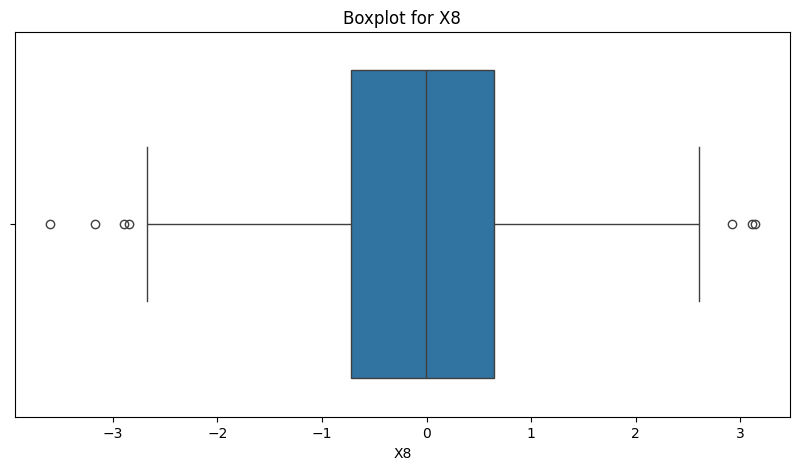

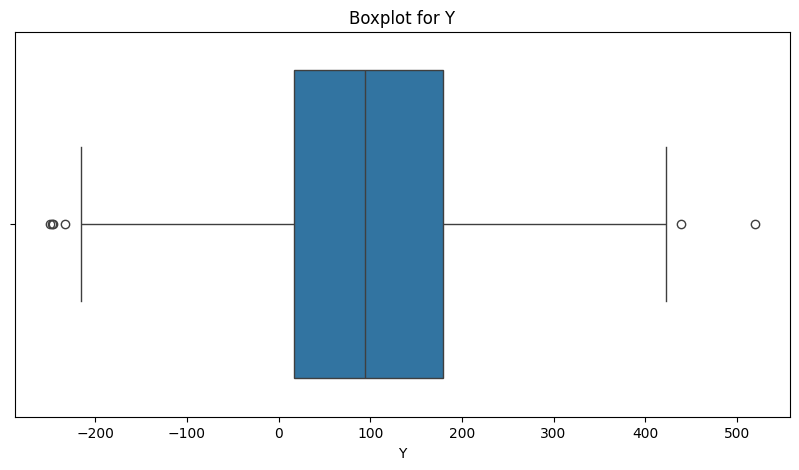

In [31]:
for column in data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Bundan shuni aytsak boladiki barcha ozgaruvchilarda Y ga nisbatan outlierlar deyarli sezilarli darajada kam bu esa modelni yanada aniq ifodalashga yordam beradi


#### Train/Test Split and Model Evaluation

In [32]:
X = data.drop(columns=['Y'])
y = data['Y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 4.139568690624858
RMSE: 2.034593003680308


#### Residual Analysis

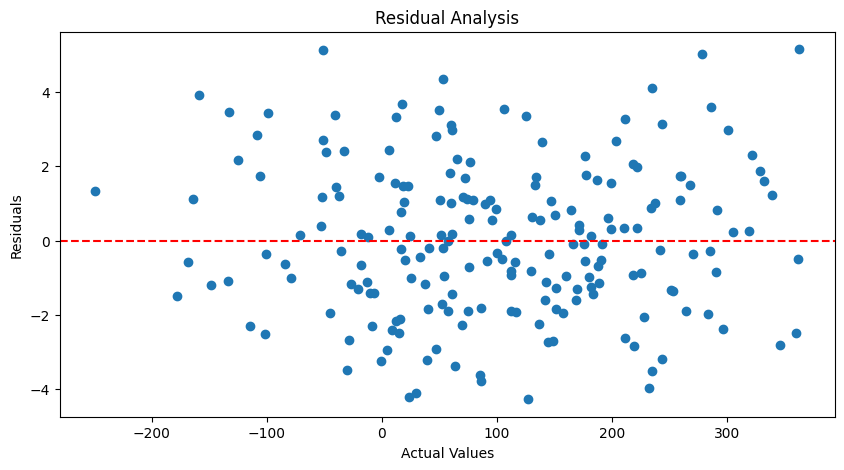

In [33]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()